<AxesSubplot:xlabel='x', ylabel='y'>

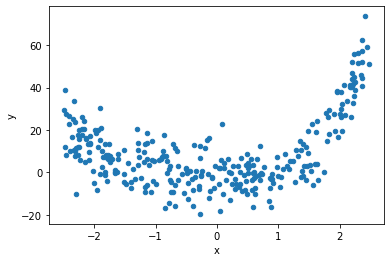

In [277]:
import numpy as np
import pandas as pd

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')
#X = df['x']
#y = df['y']
#print(X.shape)
#print(df['x'])


In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_test.shape, X_train.shape)
#print(X_train)
#print(X_train)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
X_new = np.array([[0], [2]])
print(X_new)

print(lin_reg.intercept_, lin_reg.coef_, "\n",
lin_reg.predict(X_new))

lin_train_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
lin_test_mse = mean_squared_error(y_test, lin_reg.predict(X_test))
print(lin_train_mse, lin_test_mse)

[[0]
 [2]]
[9.53486921] [[3.12235618]] 
 [[ 9.53486921]
 [15.77958156]]
241.28795126208055 242.12748820149312


In [280]:
import sklearn.neighbors

knn_3_reg = sklearn.neighbors.KNeighborsRegressor(
n_neighbors=3)
knn_3_reg.fit(X_train, y_train)

knn3_train_mse = mean_squared_error(y_train, knn_3_reg.predict(X_train))
knn3_test_mse = mean_squared_error(y_test, knn_3_reg.predict(X_test))
print(knn3_train_mse, knn3_test_mse)


53.28738428698418 82.99078777305775


In [281]:
import sklearn.neighbors

knn_5_reg = sklearn.neighbors.KNeighborsRegressor(
n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

knn5_train_mse = mean_squared_error(y_train, knn_5_reg.predict(X_train))
knn5_test_mse = mean_squared_error(y_test, knn_5_reg.predict(X_test))
print(knn5_train_mse, knn5_test_mse)

58.08344235949282 64.19259348048143


[-4.71988986] [[4.24738253 6.35342376]]
[[-4.71988986]
 [29.18857023]]
29.18857022979566
90.44869034184441 83.70332209445864


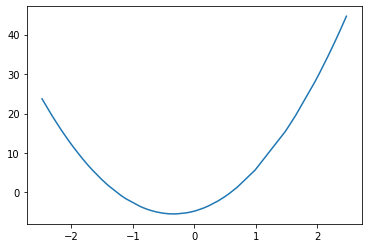

In [282]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly_feature_2.fit_transform(X_train)
X_poly_test = poly_feature_2.fit_transform(X_test)

#print(X_train[0], X_poly_train[0])
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_train, y_train)
print(poly_2_reg.intercept_, poly_2_reg.coef_)
print(poly_2_reg.predict(poly_feature_2.fit_transform([[0],[2]])))
print(poly_2_reg.coef_[0][1] * 2**2 + poly_2_reg.coef_[0][0] * 2 + poly_2_reg.intercept_[0])

poly2_train_mse = mean_squared_error(y_train, poly_2_reg.predict(X_poly_train))
poly2_test_mse = mean_squared_error(y_test, poly_2_reg.predict(X_poly_test))
print(poly2_train_mse, poly2_test_mse)

import matplotlib.pyplot as plt

X_sort = pd.Series(X_test.flatten()).sort_values()
y_sort = pd.Series((poly_2_reg.predict(X_poly_test)).flatten()).reindex(X_sort.index)

plt.plot(X_sort, y_sort)

[-4.80602703] [[-2.64605279  6.52374119  1.75882359]]
[[-4.80602703]
 [30.06742091]]
15.996832160550328
73.36470707950005 74.78718782425267


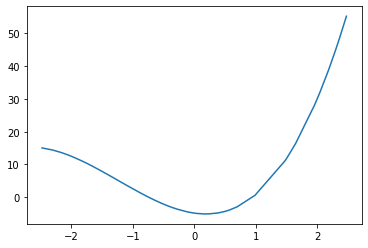

In [283]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature_3.fit_transform(X_train)
X_poly_test = poly_feature_3.fit_transform(X_test)
#print(X_train[0], X_poly_train[0])
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_train, y_train)
print(poly_3_reg.intercept_, poly_3_reg.coef_)
print(poly_3_reg.predict(poly_feature_3.fit_transform([[0],[2]])))
print(poly_3_reg.coef_[0][1] * 2**2 + poly_3_reg.coef_[0][0] * 2 + poly_3_reg.intercept_[0])

poly3_train_mse = mean_squared_error(y_train, poly_3_reg.predict(X_poly_train))
poly3_test_mse = mean_squared_error(y_test, poly_3_reg.predict(X_poly_test))
print(poly3_train_mse, poly3_test_mse)

import matplotlib.pyplot as plt
X_sort = pd.Series(X_test.flatten()).sort_values()
y_sort = pd.Series((poly_3_reg.predict(X_poly_test)).flatten()).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

[-1.81907395] [[-3.20116375  1.66307809  1.91630216  0.90184051]]
[[-1.81907395]
 [28.19077626]]
-1.5690890881678579
66.98594936500216 61.88897127638041


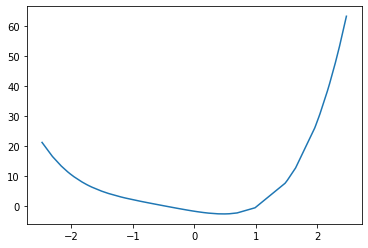

In [284]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train = poly_feature_4.fit_transform(X_train)
X_poly_test = poly_feature_4.fit_transform(X_test)
#print(X_train[0], X_poly_train[0])
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_train, y_train)
print(poly_4_reg.intercept_, poly_4_reg.coef_)
print(poly_4_reg.predict(poly_feature_4.fit_transform([[0],[2]])))
print(poly_4_reg.coef_[0][1] * 2**2 + poly_4_reg.coef_[0][0] * 2 + poly_4_reg.intercept_[0])

poly4_train_mse = mean_squared_error(y_train, poly_4_reg.predict(X_poly_train))
poly4_test_mse = mean_squared_error(y_test, poly_4_reg.predict(X_poly_test))
print(poly4_train_mse, poly4_test_mse)

import matplotlib.pyplot as plt
X_sort = pd.Series(X_test.flatten()).sort_values()
y_sort = pd.Series((poly_4_reg.predict(X_poly_test)).flatten()).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

[-0.76868961] [-0.76868961  0.59088372 -0.45420617  0.34914357 -0.26838303]
[-1.80905666] [[-2.68423523  1.60944045  1.5192617   0.9138287   0.05834992]]
[[-1.80905666]
 [27.90278485]]
-0.739765309405537
66.94274252943715 62.50334026240942


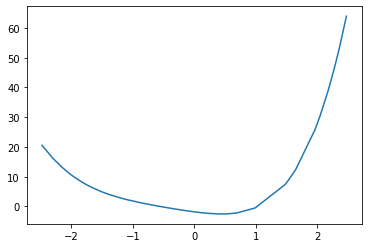

In [285]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_train = poly_feature_5.fit_transform(X_train)
X_poly_test = poly_feature_5.fit_transform(X_test)
print(X_train[0], X_poly_train[0])
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_train, y_train)
print(poly_5_reg.intercept_, poly_5_reg.coef_)
print(poly_5_reg.predict(poly_feature_5.fit_transform([[0],[2]])))
print(poly_5_reg.coef_[0][1] * 2**2 + poly_5_reg.coef_[0][0] * 2 + poly_5_reg.intercept_[0])

poly5_train_mse = mean_squared_error(y_train, poly_5_reg.predict((X_poly_train)))
poly5_test_mse = mean_squared_error(y_test, poly_5_reg.predict((X_poly_test)))
print(poly5_train_mse, poly5_test_mse)
import matplotlib.pyplot as plt
X_sort = pd.Series(X_test.flatten()).sort_values()
y_sort = pd.Series((poly_5_reg.predict(X_poly_test)).flatten()).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

In [286]:


mse_list = [[lin_train_mse, lin_test_mse], [knn3_train_mse, knn3_test_mse], [knn5_test_mse, knn5_test_mse], [poly2_train_mse, poly2_test_mse], [poly3_train_mse, poly3_test_mse], [poly4_train_mse, poly4_test_mse], [poly5_train_mse, poly5_test_mse]]

mse_df = pd.DataFrame(mse_list, index=["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"], columns=["train_mse", "test_mse"])
print(mse_df)
import pickle
with open('mse.pkl', 'wb') as fp:
    pickle.dump(mse_df, fp)


             train_mse    test_mse
lin_reg     241.287951  242.127488
knn_3_reg    53.287384   82.990788
knn_5_reg    64.192593   64.192593
poly_2_reg   90.448690   83.703322
poly_3_reg   73.364707   74.787188
poly_4_reg   66.985949   61.888971
poly_5_reg   66.942743   62.503340


In [287]:
reg = list()
reg.append((lin_reg, None))
reg.append((knn_3_reg, None))
reg.append((knn_5_reg, None))
reg.append((poly_2_reg, poly_feature_2))
reg.append((poly_3_reg, poly_feature_3))
reg.append((poly_4_reg, poly_feature_4))
reg.append((poly_5_reg, poly_feature_5))
print(reg)
with open('reg.pkl', 'wb') as fp:
    pickle.dump(reg, fp)

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
